# ゴミ分別（バックエンド）

## データの読み込み
data→浅尾さんが作ってくれたデータです。
dataに画像データの名前があって、画像データそのものは別のファイル(dataset_team4/img_team4/batch_1とか)に入ってます。
ここでは、dataにある画像データの名前から画像データそのものを取ってきて、dataframe型にしたのち、元のdataの横に結合することで一つのdataframeを作りました。

### 必要なやつのimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
import cv2

### データの読み込み（画像データそのものは別ファイルに保存、その名前がimg_fileの列にあります）

In [2]:
data = pd.read_csv("dataset_team4/df_1_final.csv")

In [3]:
data[:5]

,img_id,img_width,img_height,img_file,cat_name,supercategory,x,y,width,height,area
0,0,1537,2049,batch_1/000000.jpg,Clear plastic bottle,Bottle,710.0,1225.0,153.0,198.0,14765.5
1,1,1241,751,batch_1/000004.jpg,Drink can,Can,649.0,55.0,93.0,88.0,4273.0
2,2,1537,2049,batch_1/000005.jpg,Clear plastic bottle,Bottle,824.0,557.0,89.0,236.0,17734.0
3,3,1537,2049,batch_1/000006.jpg,Glass bottle,Bottle,517.0,127.0,447.0,1322.0,403954.0
4,4,1537,2049,batch_1/000011.jpg,Drink can,Can,522.0,1168.0,240.0,122.0,23393.0


### 使う画像データの名前をまとめる。
globってやつで条件に合うものを取り出すことができる。
ここではbatch_1、batch_2、batch_3、、、、、って15個あるフォルダから画像データの名前を取り出してまとめて一つにした。

In [4]:
files_1 = sorted(glob.glob("dataset_team4/img_team4/batch_1/*"))
files_2 = sorted(glob.glob("dataset_team4/img_team4/batch_2/*"))
files_3 = sorted(glob.glob("dataset_team4/img_team4/batch_3/*"))
files_4 = sorted(glob.glob("dataset_team4/img_team4/batch_4/*"))
files_5 = sorted(glob.glob("dataset_team4/img_team4/batch_5/*"))
files_6 = sorted(glob.glob("dataset_team4/img_team4/batch_6/*"))
files_7 = sorted(glob.glob("dataset_team4/img_team4/batch_7/*"))
files_8 = sorted(glob.glob("dataset_team4/img_team4/batch_8/*"))
files_9 = sorted(glob.glob("dataset_team4/img_team4/batch_9/*"))
files_10 = sorted(glob.glob("dataset_team4/img_team4/batch_10/*"))
files_11 = sorted(glob.glob("dataset_team4/img_team4/batch_11/*"))
files_12 = sorted(glob.glob("dataset_team4/img_team4/batch_12/*"))
files_13 = sorted(glob.glob("dataset_team4/img_team4/batch_13/*"))
files_14 = sorted(glob.glob("dataset_team4/img_team4/batch_14/*"))
files_15 = sorted(glob.glob("dataset_team4/img_team4/batch_15/*"))

In [5]:
files = files_1 + files_2 + files_3 + files_4 + files_5 + files_6 + files_7 + files_8 + files_9 + files_10 + files_11 + files_12 + files_13 + files_14 + files_15

In [6]:
files[:5]
#filesってリストの中には使うデータの名前がずらっと並んでる

['dataset_team4/img_team4/batch_1/000000.jpg',
 'dataset_team4/img_team4/batch_1/000004.jpg',
 'dataset_team4/img_team4/batch_1/000005.jpg',
 'dataset_team4/img_team4/batch_1/000006.jpg',
 'dataset_team4/img_team4/batch_1/000011.jpg']

### 画像データそのものを読み込んでいく
一つ上でまとめた画像データの名前をもとに、読み込んでいく。
imagesの中には画像データそのものが入っていく。

In [7]:
images = []

for i in files:
    #image_size = 60
    image = Image.open(i)
    image = image.convert("RGB")
    #image = image.resize((image_size, image_size))
    image_diverse = np.asarray(image)
    images.append(image_diverse)

In [8]:
#images[0]　重いのでコメントアウト
#試しに初めのデータをみてみる。numpy型になっている。

In [9]:
images[0].shape

(2049, 1537, 3)

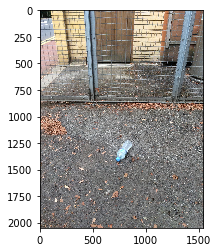

In [10]:
plt.imshow(images[0])
#確かに一番初めの画像が読み込まれている。

### ゴミがある部分だけの切り出し。
背景があると邪魔だから、ゴミがある部分だけを切り出してtrm_imagesってリストに格納。
使う情報はdataの中にあるx,y(ゴミがある座標)とwidth,height(ゴミがある範囲)

In [11]:
x = data['x']
y = data['y']
width = data['width']
height = data['height']
    
trm_images = []
index = 0
while (214 > index):
    triming = images[index][int(y[index]):int((y[index]+height[index])),int(x[index]):int((x[index]+width[index]))]#スライスで切り出し。スライスに小数は使えないから、intで丸めた。

    index += 1

    trm_images.append(triming)
    

In [12]:
#trm_images[0]　重いのでコメントアウト

In [13]:
trm_images[0].shape

(198, 153, 3)

In [14]:
type(trm_images[0].shape)

tuple

### 切り出した時、画像の範囲を超えているものがあったので、それを手動で切り出し。
画像全体の範囲よりもゴミのある位置が外側に指定されているデータがあった。(147番目と210番目)

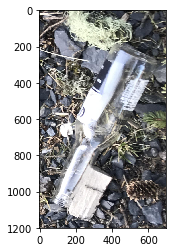

In [15]:
#210 147
x = 2300,
y=500
height=1000
width = 500
trm_image_147 = images[147][500:500+1000,2300:2300+500] 
trm_image_210 = images[210][1000:2200,3000:3700]
plt.imshow(trm_image_210)

In [16]:
#リストに代入
trm_images[147] = trm_image_147
trm_images[210] = trm_image_210
trm_images[210].shape

(1200, 700, 3)

In [17]:
#サイズ合わせ
trm_images_resize=[]
for trm_image in trm_images:
    resize = cv2.resize(trm_image,(120,120))
    trm_images_resize.append(resize)

In [18]:
#確認
index=0
while index<5:
    print(trm_images_resize[index].shape,index)
    index+=1


(120, 120, 3) 0
(120, 120, 3) 1
(120, 120, 3) 2
(120, 120, 3) 3
(120, 120, 3) 4


In [19]:
type(trm_images_resize[0])

numpy.ndarray

In [20]:
type(trm_images_resize)

list

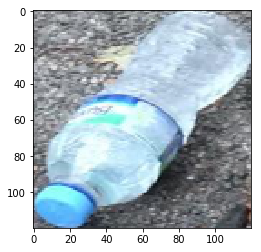

In [21]:
plt.imshow(trm_images_resize[0])

### trm_imaesはリストだから、dataframeにしてdataと結合する。
→ここいらなかった

In [22]:
# image_df = pd.Series(trm_images_resize)

In [23]:
# image_df = pd.DataFrame(image_df)

In [24]:
# image_df.head()

In [25]:
# image_df.loc[1].values.shape

In [26]:
# image_df.columns = ['img']
##これはカラム名をimgにして分かりやすくしている。

In [27]:
# image_df.at[0, 'img'].shape

In [28]:
# type(image_df)

In [29]:
# type(data)

In [30]:
# df = pd.concat([data, image_df], axis=1)
# df.head()

##横に結合したものが得られた。

# Labelとの結合

In [31]:
# label = pd.read_csv("dataset_team4/Label.csv")

In [32]:
# df_label = pd.concat([df, label['Label']], axis=1)

In [33]:
# df_trash = df_label.loc[:, ['img', 'Label','cat_name']]
# df_trash.head()

In [34]:
#df_trash.to_csv('df_trash.csv')

In [35]:
# plt.imshow(df_trash.at[0,'img'])

In [36]:
# data = df_trash.loc[:,['img']]
#data=df_trash.loc[:,'img']
#data=df_trash.at[:,'img']
# cat_name = df_trash.loc[:,['cat_name']]
# plt.imshow(data.at[0,'img'])

### モデルの作成

In [37]:
label_list = ['Clear plastic bottle', 'Disposable plastic cup', 'Drink can', 'Glass bottle', 'Plastic film']

In [38]:
set(data['cat_name'])

{'Clear plastic bottle',
 'Disposable plastic cup',
 'Drink can',
 'Glass bottle',
 'Plastic film'}

In [39]:
#ラベルをマッピングする
label_mapping = {'Clear plastic bottle':0, 'Disposable plastic cup':1, 'Drink can':2, 'Glass bottle':3, 'Plastic film':4}

In [40]:
data['cat_name'] = data['cat_name'].map(label_mapping)

In [41]:
data['cat_name']

0      0
1      2
2      0
3      3
4      2
5      3
6      3
7      3
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     2
16     4
17     0
18     0
19     1
20     2
21     4
22     4
23     4
24     4
25     4
26     0
27     4
28     2
29     2
      ..
184    3
185    4
186    4
187    2
188    4
189    0
190    2
191    0
192    4
193    1
194    4
195    4
196    4
197    2
198    4
199    4
200    4
201    1
202    1
203    4
204    3
205    3
206    4
207    4
208    1
209    4
210    3
211    1
212    1
213    3
Name: cat_name, Length: 214, dtype: int64

In [42]:
x = trm_images_resize
y = data['cat_name'].values

In [43]:
type(x)

list

In [44]:
type(y)

numpy.ndarray

In [45]:
X = np.array(x)

In [46]:
type(X)

numpy.ndarray

In [47]:
X.shape

(214, 120, 120, 3)

In [48]:
y.shape

(214,)

In [50]:
X_train[:5]

array([[[[ 44,  39,  27],
         [212, 197, 172],
         [137, 116,  90],
         ...,
         [246, 229, 201],
         [175, 153, 128],
         [ 59,  34,  18]],

        [[ 46,  40,  24],
         [157, 140, 112],
         [255, 243, 217],
         ...,
         [223, 207, 183],
         [107,  86,  66],
         [105,  78,  66]],

        [[ 56,  49,  30],
         [ 83,  67,  37],
         [190, 176, 158],
         ...,
         [109,  91,  73],
         [124, 104,  89],
         [156, 135, 126]],

        ...,

        [[113,  94,  87],
         [ 99,  81,  71],
         [ 68,  46,  38],
         ...,
         [ 32,  27,  23],
         [ 23,  19,  16],
         [ 22,  22,  21]],

        [[ 99,  80,  73],
         [100,  82,  72],
         [ 71,  51,  42],
         ...,
         [ 29,  24,  20],
         [ 22,  18,  15],
         [ 25,  24,  22]],

        [[120, 101,  94],
         [123, 105,  95],
         [ 92,  74,  64],
         ...,
         [ 22,  18,  15],
        

In [51]:
#y_trainにラベルが入っているので、plastic filmラベル以外の画像を水増し
for index, name in enumerate(y_train):
    if name != 4:  #y_trainのplastic filmラベル以外のindexを取得
        #反転させて元のX_trainに追加
        fliped = cv2.flip(X_train[index],1)
        fliped = fliped[np.newaxis, :, :, : ]#X_trainとflipedの次元を合わせる
        X_train = np.append(X_train, fliped, axis=0)
        y_train = np.append(y_train, name)
        y_train = np.append(y_train, name) #←下でこれを実行するとリストに入らないためここで指定しています。
        #回転させて追加
        size_1 = (120, 120)
        # 回転の中心位置を表す座標（画像の中心に指定）
        center_1 = (60, 60)
        # 回転角度
        angle_1 = 30
        # 拡大･縮小の比率（拡大･縮小なしに指定）
        scale_1 = 1.0

        # 回転変換を表す行列をつくる
        # (中心位置, 回転角度, 拡大･縮小の比率)
        rotation_matrix_1 = cv2.getRotationMatrix2D(center_1, angle_1, scale_1)
        # 回転変換を行う
        # (画像, 回転行列, 変換後の画像サイズ)
        rotated_1 = cv2.warpAffine(X_train[index], rotation_matrix_1, size_1)
        rotated_1 = rotated_1[np.newaxis, :, :, : ]
        X_train = np.append(X_train, rotated_1, axis=0)
        #y_trian = np.append(y_train, name) ←で指定するとなぜかリストに入らないので上で二回指定しています。
        if name == 3:
            # 表示する画像のサイズ(変換前と同じサイズに指定)
            size_2 = (120, 120)
            # 回転の中心位置を表す座標（画像の中心に指定）
            center_2 = (60, 60)
            # 回転角度
            angle_2 = 124
            # 拡大･縮小の比率（拡大･縮小なしに指定）
            scale_2 = 1.0

            # 回転変換を表す行列をつくる
            # (中心位置, 回転角度, 拡大･縮小の比率)
            rotation_matrix_2 = cv2.getRotationMatrix2D(center_2, angle_2, scale_2)
            # 回転変換を行う
            # (画像, 回転行列, 変換後の画像サイズ)
            rotated_2 = cv2.warpAffine(X_train[index], rotation_matrix_2, size_2)
            rotated_2 = rotated_2[np.newaxis, :, :, : ]
            X_train = np.append(X_train, rotated_2, axis=0)
            y_train = np.append(y_train, name)
    else:
        continue


In [52]:
y_train[:5]

array([0, 2, 4, 4, 4])

In [53]:
y_train.shape

(310,)

In [54]:
type(y_train)

numpy.ndarray

In [55]:
type(y_test)

numpy.ndarray

In [2]:
#kerasの入力はintじゃなくてfloatだから型変換
X_train = X_train.astype('f')
X_test = X_test.astype('f')

NameError: name 'X_train' is not defined

In [57]:
#ラベルをone-hotエンコーディング
Y_train = np.identity(5)[y_train].astype('i')
Y_test = np.identity(5)[y_test].astype('i')

In [58]:
#正規化
X_train /= 255.0
X_test /= 255.0

In [59]:
def show_train_sample_info(index):
    img = X_train[index]
    
    plt.imshow(img)
    plt.show()
# 画像を出力

 # 正解ラベルを出力
    print('class:'+ label_list[y_train[index]])
    print('label:' + str(y_train[index]))

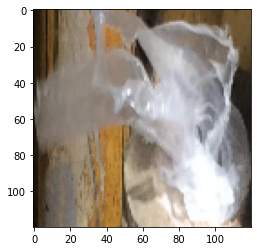

class:Plastic film
label:4


In [49]:
show_train_sample_info(80)

In [50]:
import keras
# 層構造のモデルを定義するためのメソッド
from keras.models import Sequential
# Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers import Dense, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

Using TensorFlow backend.


In [51]:
# モデルの定義

#-----------
# CNNモデル
#-----------

model = Sequential()

model.add(Conv2D(filters=64, input_shape=(120, 120, 3), kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

In [52]:
# 同様に学習前にコンパイルします。
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01), # 学習率を0.01に指定
              metrics=['accuracy'])

# ミニバッチに含まれるサンプル数を指定
batch_size = 500

# epoch数を指定
n_epoch = 30

In [53]:
hist = model.fit(X_train,
                 Y_train,
                 epochs=n_epoch,
                 validation_data=(X_test, Y_test),
                 verbose=1,
                 batch_size=batch_size)

Train on 310 samples, validate on 65 samples
Epoch 1/30
310/310 [==============================] - 39s 125ms/step - loss: 1.6103 - accuracy: 0.1581 - val_loss: 1.5926 - val_accuracy: 0.4154
Epoch 2/30
310/310 [==============================] - 20s 65ms/step - loss: 1.5977 - accuracy: 0.3548 - val_loss: 1.5724 - val_accuracy: 0.4154
Epoch 3/30
310/310 [==============================] - 20s 65ms/step - loss: 1.5883 - accuracy: 0.3355 - val_loss: 1.5558 - val_accuracy: 0.4308
Epoch 4/30
310/310 [==============================] - 20s 64ms/step - loss: 1.5810 - accuracy: 0.3194 - val_loss: 1.5424 - val_accuracy: 0.4154
Epoch 5/30
310/310 [==============================] - 20s 65ms/step - loss: 1.5750 - accuracy: 0.3290 - val_loss: 1.5315 - val_accuracy: 0.4154
Epoch 6/30
310/310 [==============================] - 20s 64ms/step - loss: 1.5701 - accuracy: 0.3290 - val_loss: 1.5224 - val_accuracy: 0.4000
Epoch 7/30
310/310 [==============================] - 20s 64ms/step - loss: 1.5660 - accur

In [54]:
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(y_test, model.predict(X_test).argmax(axis=1)))
print('recall: %.3f' % metrics.recall_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('precision: %.3f' % metrics.precision_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('f1_score: %.3f' % metrics.f1_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))

accuracy: 0.400
recall: 0.202


C:\Users\kd207\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision: 0.124
f1_score: 0.151


In [55]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

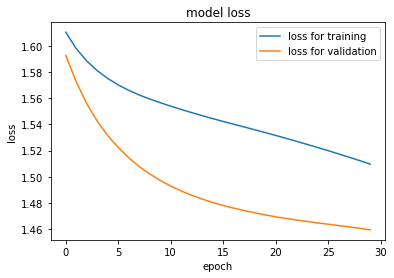

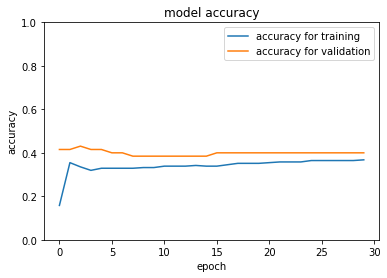

In [56]:
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

def plot_history_acc(hist):
    # 精度(Accuracy)の遷移のプロット
    plt.plot(hist.history['accuracy'],label="accuracy for training")
    plt.plot(hist.history['val_accuracy'],label="accuracy for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

In [57]:
# testデータのサンプルについて情報を確認する関数
# (testデータのindex)
def show_test_sample_info(index):
    img = X_test[index]
    
    # 画像を出力
    plt.imshow(img)
    plt.show()
    
    # 正解ラベルを出力
    print('class: ' + label_list[y_test[index]])
    print('label: ' + str(y_test[index]))

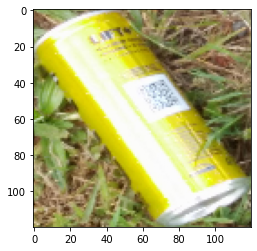

class: Drink can
label: 2
predict: 4
間違いです｡


In [62]:
# indexを指定
index = 0

# 画像を出力
show_test_sample_info(index)

# 指定のindexが与えられたtestデータについて確認
pred = model.predict(X_test[index].reshape(1, 120, 120, 3)).argmax()
print('predict: {}'.format(pred))

# 正解か不正解かを出力
if pred == y_test[index]:
    print('正解です｡')
else:
    print('間違いです｡')

In [1]:
print(model.evaluate(X_test,y_test))

NameError: name 'model' is not defined